**Titulo** Unai Bermúdez Osaba | 26/11/2023

**Descripción :** Diseñar un modelo de clasificación supervisada que, dado un conjunto de tweets como entrada (input: texto del tweet), prediga con la mayor precisión posible si el autor tiene tendencias suicidas o no, optimizando el F-score como métrica principal.


**ANALISIS DE LOS DATOS**

Total de instancias: 9206

Clase 0:
  - Número de instancias: 5144
  - Porcentaje: 55.88%

Clase 1:
  - Número de instancias: 4062
  - Porcentaje: 44.12%


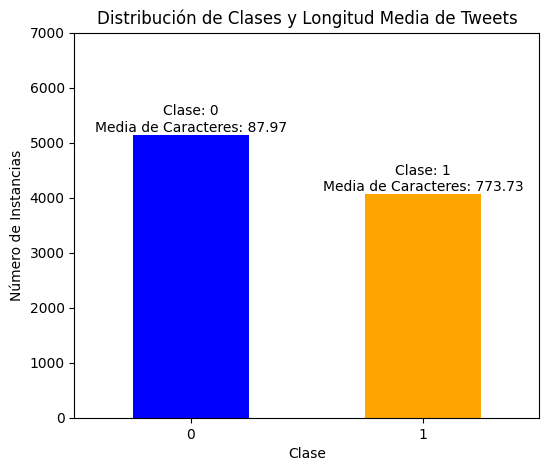


Media de Caracteres de todos los tweets: 390.55

Longitud media de los tweets por clase:
label
0     87.965591
1    773.730675
Name: tweet, dtype: float64


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV con encoding 'latin1'
file_path = 'data/suicidal_data.csv'  # Ajusta la ruta según tu estructura de carpetas
df = pd.read_csv(file_path, encoding='latin1')

# Información general sobre el conjunto de datos
total_instances = len(df)
print(f"Total de instancias: {total_instances}")

# Ajustar el tamaño del gráfico
plt.figure(figsize=(6, 5))
plt.ylim(0, 7000)

# Grafico de barras para la distribución de clases
class_distribution = df['label'].value_counts()
colors = ['blue', 'orange']  # Ajusta los colores según tus preferencias
ax = class_distribution.plot(kind='bar', rot=0, color=colors)

# Etiquetar las barras con la longitud media de los tweets de cada clase
for i, v in enumerate(class_distribution):
    class_label = average_length_per_class.index[i]
    average_length = average_length_per_class.iloc[i]
    ax.text(i, v + 5, f"Clase: {class_label}\nMedia de Caracteres: {average_length:.2f}", ha='center', va='bottom')

plt.title('Distribución de Clases y Longitud Media de Tweets')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')

# Número de instancias y porcentaje por clase
for i, count in enumerate(class_distribution):
    class_label = class_distribution.index[i]
    percentage = (count / total_instances) * 100
    print(f"\nClase {class_label}:")
    print(f"  - Número de instancias: {count}")
    print(f"  - Porcentaje: {percentage:.2f}%")

plt.show()

# Longitud media de todos los tweets
average_length_all_tweets = df['tweet'].apply(len).mean()
print(f"\nMedia de Caracteres de todos los tweets: {average_length_all_tweets:.2f}")

# Longitud media de los tweets por clase
average_length_per_class = df.groupby('label')['tweet'].apply(lambda x: x.str.len().mean())
print("\nLongitud media de los tweets por clase:")
print(average_length_per_class)

**PREPROCESO DE LOS DATOS**

In [61]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import emoji

# Descargar recursos necesarios para NLTK (puedes hacerlo solo una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Verificar y eliminar filas nulas
df = df.dropna(subset=['tweet'])

# Funciones de preprocesamiento

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Manejar emojis
    text = emoji.demojize(text)
    # Eliminar puntuación
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Mostrar algunos ejemplos antes y después del preprocesamiento
print("Ejemplos después del preprocesamiento:")
print(df[['tweet', 'processed_tweet']].head(5))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\unai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ejemplos después del preprocesamiento:
                                               tweet  \
0  my life is meaningless i just want to end my l...   
1  muttering i wanna die to myself daily for a fe...   
2  work slave i really feel like my only purpose ...   
3  i did something on the 2 of october i overdose...   
4  i feel like no one cares i just want to die ma...   

                                     processed_tweet  
0  life meaningless want end life badly life comp...  
1  muttering wan na die daily month feel worthles...  
2  work slave really feel like purpose life make ...  
3  something 2 october overdosed felt alone horri...  
4   feel like one care want die maybe feel le lonely  


**VECTORIZACION**

    BOW con CountVectorizer Normal

Accuracy: 0.9007
Precision: 0.9064
Recall: 0.8680
F1 Score: 0.8868
Confusion Matrix:
[[942  74]
 [109 717]]


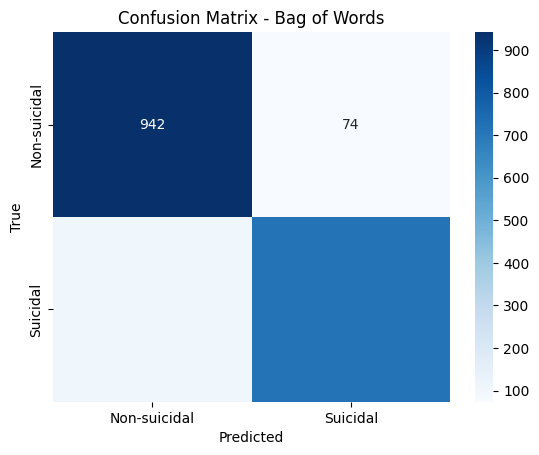

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_bow, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_bow)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - Bag of Words')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

    BOW con CountVectorizer max-features= 5000, 10000, 15000 y 20000


Métricas para max_features=5000:
Accuracy: 0.8996
Precision: 0.9021
Recall: 0.8705
F1 Score: 0.8860
Confusion Matrix:
[[938  78]
 [107 719]]


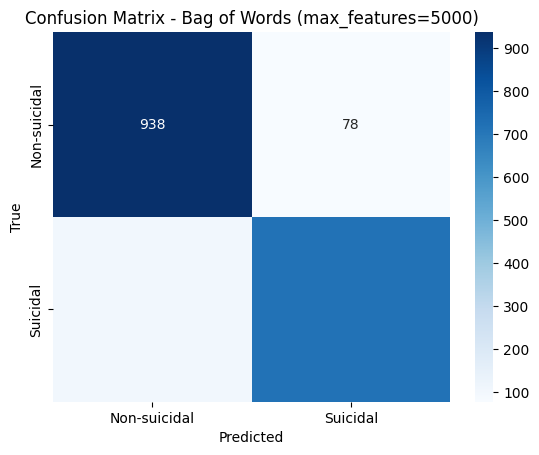


Métricas para max_features=10000:
Accuracy: 0.9039
Precision: 0.9102
Recall: 0.8717
F1 Score: 0.8905
Confusion Matrix:
[[945  71]
 [106 720]]


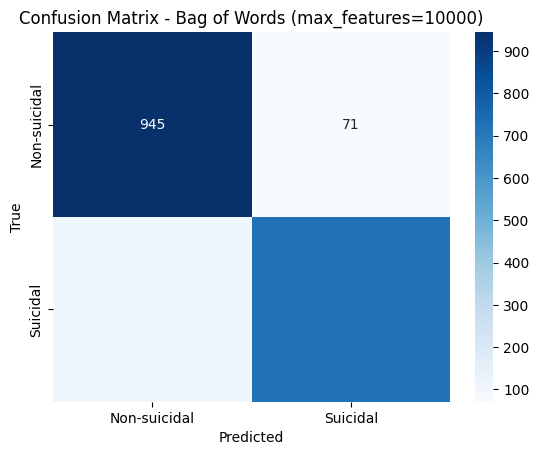


Métricas para max_features=15000:
Accuracy: 0.8985
Precision: 0.9019
Recall: 0.8680
F1 Score: 0.8846
Confusion Matrix:
[[938  78]
 [109 717]]


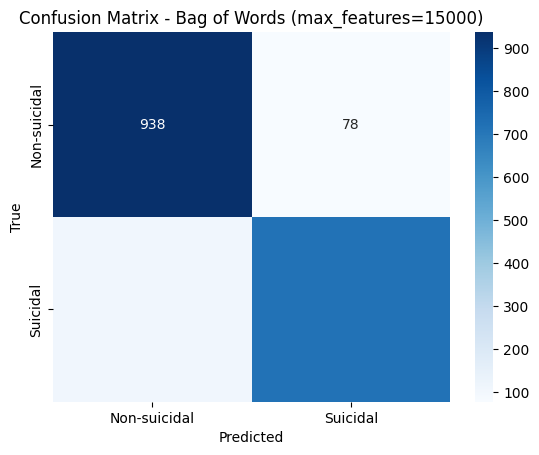


Métricas para max_features=20000:
Accuracy: 0.8996
Precision: 0.9062
Recall: 0.8656
F1 Score: 0.8854
Confusion Matrix:
[[942  74]
 [111 715]]


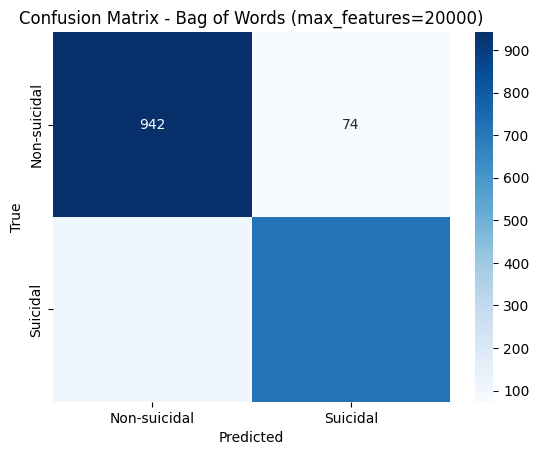

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Diferentes valores para max_features
max_features_values = [5000, 10000, 15000, 20000]

for max_features in max_features_values:
    # Vectorización con Bag of Words
    vectorizer = CountVectorizer(max_features=max_features)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)

    # Modelo de clasificación (Random Forest en este caso)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_bow, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test_bow)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar métricas de evaluación
    print(f"\nMétricas para max_features={max_features}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualizar la matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
    plt.title(f'Confusion Matrix - Bag of Words (max_features={max_features})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    BOW con CountVectorizer con N-gramas (1, 2) 

Estadísticas para CountVectorizer con N-gramas (1, 2):
Accuracy: 0.8914
Precision: 0.9288
Recall: 0.8208
F1 Score: 0.8715
Confusion Matrix:
[[964  52]
 [148 678]]


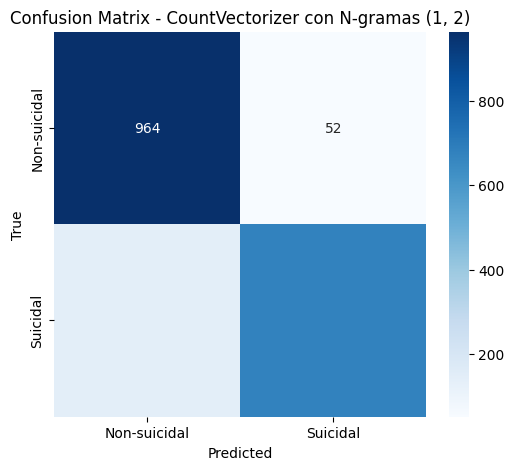

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Configuración 2: CountVectorizer con N-gramas (1, 2)
vectorizer_count_ngram = CountVectorizer(ngram_range=(1, 2))
X_train_bow_count_ngram = vectorizer_count_ngram.fit_transform(X_train)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_bow_count_ngram, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(vectorizer_count_ngram.transform(X_test))

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print("Estadísticas para CountVectorizer con N-gramas (1, 2):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - CountVectorizer con N-gramas (1, 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

    TF-IDF normal

Accuracy: 0.9061
Precision: 0.9566
Recall: 0.8281
F1 Score: 0.8877
Confusion Matrix:
[[985  31]
 [142 684]]


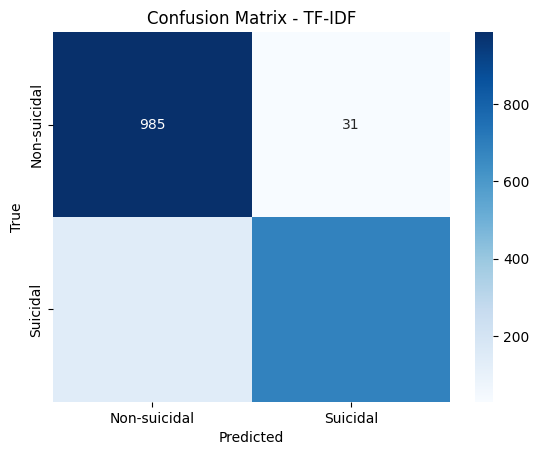

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_tfidf)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con ajuste de N-gramas

Métricas para Ajuste de N-gramas:
Accuracy: 0.8974
Precision: 0.9677
Recall: 0.7978
F1 Score: 0.8746
Confusion Matrix:
[[994  22]
 [167 659]]


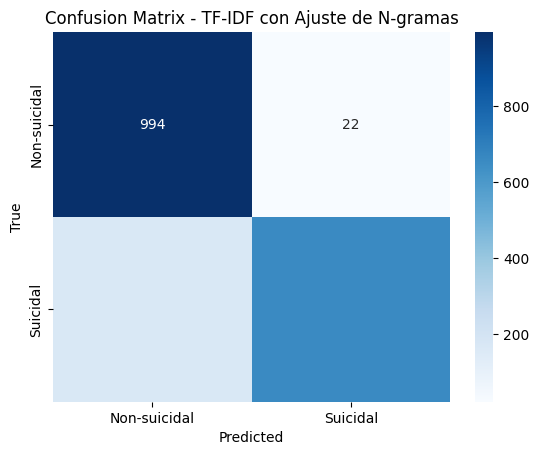

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y ajuste de N-gramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf_ngram = vectorizer_ngram.fit_transform(X_train)
X_test_tfidf_ngram = vectorizer_ngram.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_ngram = RandomForestClassifier(random_state=42)
classifier_ngram.fit(X_train_tfidf_ngram, y_train)

# Predicciones en el conjunto de prueba
y_pred_ngram = classifier_ngram.predict(X_test_tfidf_ngram)

# Calcular métricas de evaluación
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
precision_ngram = precision_score(y_test, y_pred_ngram)
recall_ngram = recall_score(y_test, y_pred_ngram)
f1_ngram = f1_score(y_test, y_pred_ngram)
conf_matrix_ngram = confusion_matrix(y_test, y_pred_ngram)

# Mostrar métricas de evaluación
print("Métricas para Ajuste de N-gramas:")
print(f"Accuracy: {accuracy_ngram:.4f}")
print(f"Precision: {precision_ngram:.4f}")
print(f"Recall: {recall_ngram:.4f}")
print(f"F1 Score: {f1_ngram:.4f}")
print("Confusion Matrix:")
print(conf_matrix_ngram)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_ngram, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Ajuste de N-gramas')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con Frecuencia Mínima del Documento


Métricas para Frecuencia Mínima del Documento:
Accuracy: 0.9066
Precision: 0.9455
Recall: 0.8402
F1 Score: 0.8897
Confusion Matrix:
[[976  40]
 [132 694]]


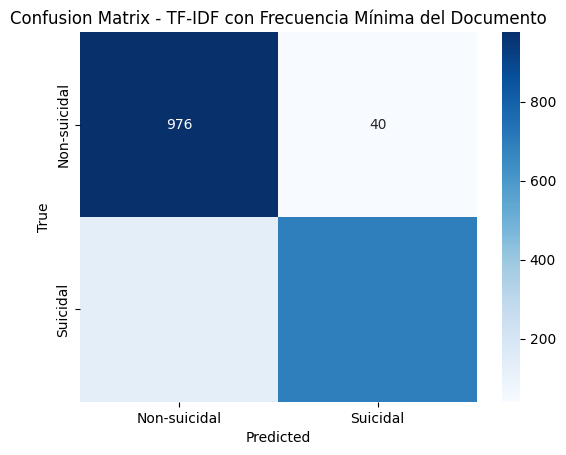

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Frecuencia Mínima del Documento
vectorizer_min_df = TfidfVectorizer(min_df=5)
X_train_tfidf_min_df = vectorizer_min_df.fit_transform(X_train)
X_test_tfidf_min_df = vectorizer_min_df.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_min_df = RandomForestClassifier(random_state=42)
classifier_min_df.fit(X_train_tfidf_min_df, y_train)

# Predicciones en el conjunto de prueba
y_pred_min_df = classifier_min_df.predict(X_test_tfidf_min_df)

# Calcular métricas de evaluación
accuracy_min_df = accuracy_score(y_test, y_pred_min_df)
precision_min_df = precision_score(y_test, y_pred_min_df)
recall_min_df = recall_score(y_test, y_pred_min_df)
f1_min_df = f1_score(y_test, y_pred_min_df)
conf_matrix_min_df = confusion_matrix(y_test, y_pred_min_df)

# Mostrar métricas de evaluación
print("\nMétricas para Frecuencia Mínima del Documento:")
print(f"Accuracy: {accuracy_min_df:.4f}")
print(f"Precision: {precision_min_df:.4f}")
print(f"Recall: {recall_min_df:.4f}")
print(f"F1 Score: {f1_min_df:.4f}")
print("Confusion Matrix:")
print(conf_matrix_min_df)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_min_df, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Frecuencia Mínima del Documento')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    TF-IDF con Ponderación de Términos por IDF ponderada por TF


Métricas para Ponderación de Términos por IDF ponderada por TF:
Accuracy: 0.9093
Precision: 0.9508
Recall: 0.8414
F1 Score: 0.8927
Confusion Matrix:
[[980  36]
 [131 695]]


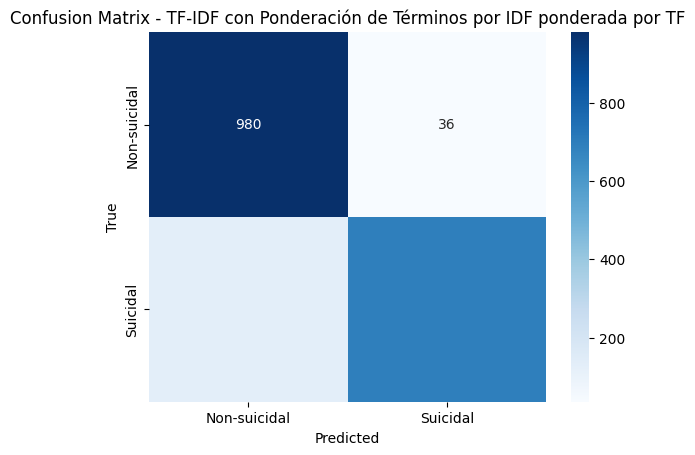

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer_use_idf = TfidfVectorizer(use_idf=False)
X_train_tfidf_use_idf = vectorizer_use_idf.fit_transform(X_train)
X_test_tfidf_use_idf = vectorizer_use_idf.transform(X_test)

# Modelo de clasificación (Random Forest en este caso)
classifier_use_idf = RandomForestClassifier(random_state=42)
classifier_use_idf.fit(X_train_tfidf_use_idf, y_train)

# Predicciones en el conjunto de prueba
y_pred_use_idf = classifier_use_idf.predict(X_test_tfidf_use_idf)

# Calcular métricas de evaluación
accuracy_use_idf = accuracy_score(y_test, y_pred_use_idf)
precision_use_idf = precision_score(y_test, y_pred_use_idf)
recall_use_idf = recall_score(y_test, y_pred_use_idf)
f1_use_idf = f1_score(y_test, y_pred_use_idf)
conf_matrix_use_idf = confusion_matrix(y_test, y_pred_use_idf)

# Mostrar métricas de evaluación
print("\nMétricas para Ponderación de Términos por IDF ponderada por TF:")
print(f"Accuracy: {accuracy_use_idf:.4f}")
print(f"Precision: {precision_use_idf:.4f}")
print(f"Recall: {recall_use_idf:.4f}")
print(f"F1 Score: {f1_use_idf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_use_idf)


# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_use_idf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'])
plt.title('Confusion Matrix - TF-IDF con Ponderación de Términos por IDF ponderada por TF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


    Classifier 1: baseline

In [90]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Datos reales
y_true = np.concatenate([np.zeros(5144), np.ones(4062)])

# Clasificación aleatoria
y_random = np.random.choice([0, 1], size=len(y_true))

# Calcular métricas
accuracy_random = accuracy_score(y_true, y_random)
precision_random = precision_score(y_true, y_random)
recall_random = recall_score(y_true, y_random)
f1_random = f1_score(y_true, y_random)
conf_matrix_random = confusion_matrix(y_true, y_random)

# Mostrar métricas
print(f"Accuracy (Baseline aleatorio): {accuracy_random:.4f}")
print(f"Precision (Baseline aleatorio): {precision_random:.4f}")
print(f"Recall (Baseline aleatorio): {recall_random:.4f}")
print(f"F1 Score (Baseline aleatorio): {f1_random:.4f}")
print("Confusion Matrix (Baseline aleatorio):")
print(conf_matrix_random)


Accuracy (Baseline aleatorio): 0.4987
Precision (Baseline aleatorio): 0.4387
Recall (Baseline aleatorio): 0.4870
F1 Score (Baseline aleatorio): 0.4616
Confusion Matrix (Baseline aleatorio):
[[2613 2531]
 [2084 1978]]


    Classifier 2: your approach

COMPARAR LOGISTIC REGRESION CON RANDOM FOREST

           Regresión Logística  Random Forest
Accuracy              0.893594       0.909338
Precision             0.923387       0.950752
Recall                0.831719       0.841404
F1 Score              0.875159       0.892742


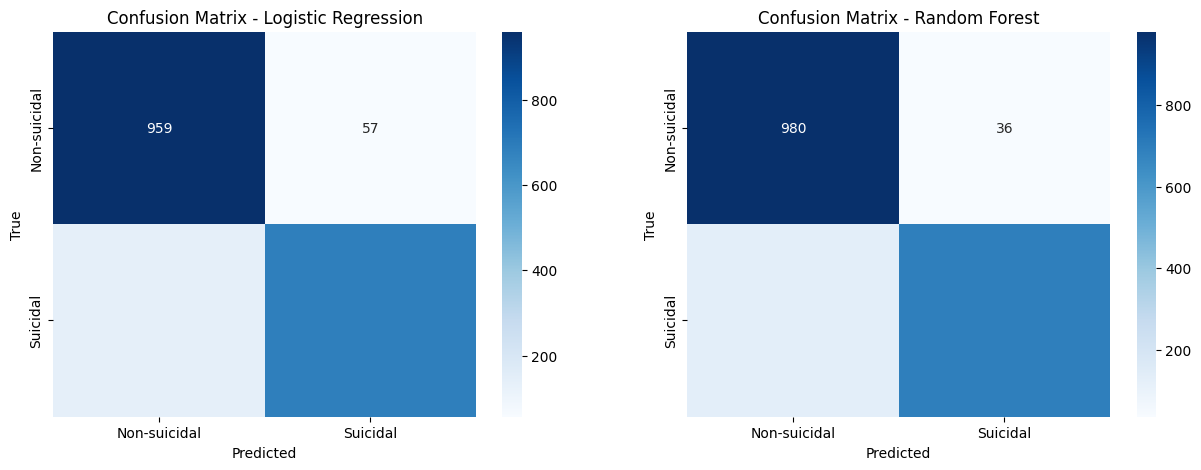

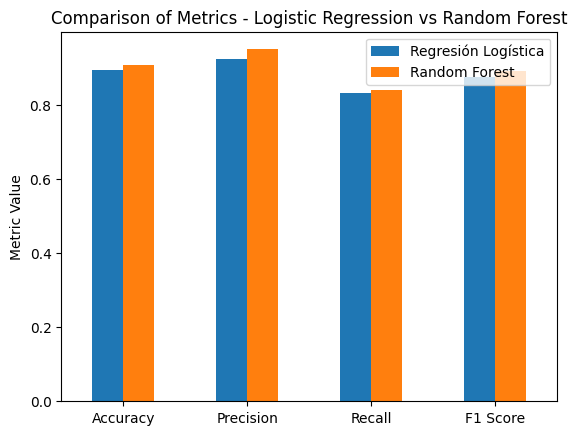

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['label'], test_size=0.2, random_state=42)

# Vectorización con TF-IDF y Ponderación de Términos por IDF ponderada por TF
vectorizer_use_idf = TfidfVectorizer(use_idf=False)
X_train_tfidf_use_idf = vectorizer_use_idf.fit_transform(X_train)
X_test_tfidf_use_idf = vectorizer_use_idf.transform(X_test)

# Modelo de clasificación (Regresión Logística)
classifier_logistic = LogisticRegression(random_state=42)
classifier_logistic.fit(X_train_tfidf_use_idf, y_train)
y_pred_logistic = classifier_logistic.predict(X_test_tfidf_use_idf)

# Modelo de clasificación (Random Forest)
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train_tfidf_use_idf, y_train)
y_pred_rf = classifier_rf.predict(X_test_tfidf_use_idf)

# Calcular métricas de evaluación
metrics_logistic = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1 Score': f1_score(y_test, y_pred_logistic)
}

metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# Crear un DataFrame para facilitar la visualización
df_metrics = pd.DataFrame({'Regresión Logística': metrics_logistic, 'Random Forest': metrics_rf})

# Mostrar métricas de evaluación
print(df_metrics)

# Visualizar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix - Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Confusion Matrix - Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-suicidal', 'Suicidal'], yticklabels=['Non-suicidal', 'Suicidal'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Gráfico de barras para comparar métricas
df_metrics.plot(kind='bar', rot=0)
plt.title('Comparison of Metrics - Logistic Regression vs Random Forest')
plt.ylabel('Metric Value')
plt.show()
